In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data_steven_anon.csv')

In [3]:
import ast
def load_visual_features(path, cwz):
    visual_features = pd.read_csv(path)
    print(len(visual_features))
#     print(visual_features)
    visual_features.features = visual_features.features.str.replace(r'[^\[] +', ', ', regex=True).apply(ast.literal_eval)
    vf = visual_features.features.apply(pd.Series)
    vf.columns = vf.columns.map('vis_feature_{}'.format)
    visual_features = pd.concat([visual_features[['scan_id']], vf], axis=1)
    if cwz:
        visual_features.set_index(['scan_id'], inplace=True)
    else:  
        visual_features['patientprimarymrn'] = pd.to_numeric(visual_features.scan_id.str.extract(r'(\d+)_st\d+').iloc[:, 0])
        visual_features['study'] = visual_features.scan_id.str.extract(r'\d+_(st\d+)').iloc[:, 0]
        visual_features.drop(columns=['scan_id'], inplace=True)
    return visual_features

In [4]:
visual_cwz = load_visual_features('../../data/raw/cwz_preds (5).csv', True)
visual_cwz

258


,vis_feature_0,vis_feature_1,vis_feature_2,vis_feature_3,vis_feature_4,vis_feature_5,vis_feature_6,vis_feature_7,vis_feature_8,vis_feature_9,...,vis_feature_50,vis_feature_51,vis_feature_52,vis_feature_53,vis_feature_54,vis_feature_55,vis_feature_56,vis_feature_57,vis_feature_58,vis_feature_59
scan_id,,,,,,,,,,,,,,,,,,,,,
55,-4.496160,-2.745639,-2.575471,-0.008700,7.113443,7.396276,9.854604,0.100944,1.999237,1.616565,...,-1.405401,-1.384378,-1.212076,-1.189800,-1.187900,-1.173055,-9.122608,-8.925362,-8.849688,-0.923273
84,2.806867,2.819759,2.317768,2.330266,3.381526,3.504354,2.904047,3.024475,3.187248,3.503367,...,2.841778,2.728686,0.822111,0.793279,0.873804,0.829842,-0.390464,-0.386274,-0.371973,-0.413959
29,-0.580699,-0.551752,-0.558355,-0.530318,-0.433520,-0.509670,-0.406444,-0.483075,0.189461,-0.107519,...,-1.202362,-1.164445,-0.970110,-0.947747,-0.973538,-0.955477,-0.695281,-0.698520,-0.711876,-0.763410
171,0.184839,0.222050,0.176674,0.214625,1.332345,1.368712,1.321980,1.359175,2.745847,2.716447,...,0.770675,0.628775,-0.433643,-0.450494,-0.448619,-0.468479,-0.662406,-0.665938,-0.691295,-0.743963
261,0.359975,0.414118,0.336472,0.387573,0.378910,0.404797,0.372611,0.395199,0.263762,0.246561,...,-1.502049,-1.496172,-1.125306,-1.128514,-1.125185,-1.131577,-0.706025,-0.720274,-0.715704,-0.769694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,0.064539,0.080916,0.090361,0.103957,1.185347,1.146651,1.205684,1.164970,2.591774,2.446881,...,4.087820,4.101952,1.242651,1.254284,1.233551,1.241323,-0.322520,-0.331646,-0.340867,-0.399153
140,-0.413619,-0.457544,-0.454490,-0.487602,-0.627621,-0.645841,-0.629948,-0.639792,-0.408087,-0.303671,...,-1.531370,-1.509033,-1.252813,-1.244135,-1.237327,-1.231619,-0.864253,-0.871522,-0.867404,-0.917374
257,-0.510884,-0.469759,-0.484806,-0.444568,-0.706197,-0.655956,-0.676428,-0.626828,-0.874422,-0.834990,...,-1.136543,-1.103573,-0.910307,-0.888976,-0.910678,-0.893885,-0.633696,-0.634708,-0.647933,-0.699448


In [5]:
visual_rumc_train = load_visual_features("../../data/raw/predictions__train_changed['test_csv_version', 'copy_data_to_local']to['12_05_2020_2', True]_features.p.csv", False)
visual_rumc_val = load_visual_features("../../data/raw/predictions__val_changed['test_csv_version', 'copy_data_to_local']to['12_05_2020_2', True]_features.p.csv", False)
visual_rumc_test = load_visual_features("../../data/raw/predictions__test_changed['test_csv_version', 'copy_data_to_local']to['12_05_2020_2', True]_features.p.csv", False)
visual_rumc = pd.concat([visual_rumc_train, visual_rumc_val, visual_rumc_test])
visual_rumc

512
165
119


,vis_feature_0,vis_feature_1,vis_feature_2,vis_feature_3,vis_feature_4,vis_feature_5,vis_feature_6,vis_feature_7,vis_feature_8,vis_feature_9,...,vis_feature_52,vis_feature_53,vis_feature_54,vis_feature_55,vis_feature_56,vis_feature_57,vis_feature_58,vis_feature_59,patientprimarymrn,study
0,-0.844296,-0.833513,-0.817369,-0.806344,-0.632331,-0.665737,-0.601993,-0.634837,0.335346,0.152667,...,-0.713800,-0.696166,-0.718640,-0.704788,-0.485645,-0.486215,-0.505956,-0.555820,10348,st000
1,1.025310,1.153063,0.818540,0.941142,0.705383,0.786010,0.554251,0.630104,-0.060638,-0.112954,...,-1.580761,-1.559911,-1.559755,-1.540977,-1.070840,-1.070765,-1.070358,-1.117547,10619,st000
2,0.034327,0.045768,0.029789,0.041808,-0.253549,-0.238963,-0.258812,-0.243320,-0.770453,-0.752390,...,-1.269640,-1.259365,-1.246470,-1.238646,-1.260128,-1.265500,-1.214061,-1.259340,10320,st000
3,-0.386018,-0.367171,-0.391918,-0.372426,-0.138099,-0.114653,-0.140243,-0.116296,0.706170,0.731613,...,-1.401279,-1.425179,-1.356749,-1.383218,-1.044349,-1.081736,-1.040266,-1.127865,10320,st001
4,-0.099766,-0.065904,-0.089283,-0.056405,-0.227879,-0.208768,-0.208021,-0.190052,-0.435501,-0.471825,...,-1.055192,-1.040110,-1.059477,-1.048740,-0.681479,-0.683241,-0.699893,-0.751903,10525,st000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,-0.171346,-0.152792,-0.173681,-0.154611,-0.097387,-0.094556,-0.097244,-0.093889,0.321413,0.235744,...,0.237291,0.263692,0.227179,0.249156,-0.287540,-0.284714,-0.308313,-0.355384,10184,st000
115,-0.818069,-0.804180,-0.787347,-0.774707,-0.879906,-0.872438,-0.849195,-0.842792,-0.669060,-0.671978,...,-0.330756,-0.358316,-0.338974,-0.369389,-0.448104,-0.467467,-0.462573,-0.524305,10185,st000
116,1.189860,1.223927,1.037722,1.073442,0.711104,0.744223,0.589931,0.624630,-0.257460,-0.236685,...,-1.093650,-1.078944,-1.063651,-1.053770,-0.683239,-0.686428,-0.684916,-0.737285,10186,st000
117,0.507326,0.523671,0.333881,0.349155,0.344014,0.345349,0.191317,0.191657,-0.067706,-0.093672,...,-1.235087,-1.209181,-1.197551,-1.174887,-0.980481,-0.975142,-0.947672,-0.982400,10186,st001


In [6]:
(visual_rumc.patientprimarymrn.astype(str) == '10057').any()

True

In [7]:
df['scan_id'] = pd.to_numeric(df.record_id.str.split('-', expand=True).iloc[:, 2])

In [8]:
df.loc[df.scan_id.isna(), 'scan_id'] = pd.to_numeric(df[df.scan_id.isna()].record_id)

In [9]:
visual_rumc['scan_id'] = visual_rumc.patientprimarymrn.astype(str)

In [10]:
visual = pd.concat([visual_cwz.reset_index(), visual_rumc])
visual.scan_id = pd.to_numeric(visual.scan_id)

In [11]:
df_overview = pd.read_csv('../../data/raw/overview_20210329.csv')

In [12]:
df_overview.StudyDate = pd.to_datetime(df_overview.StudyDate, format='%Y%m%d')
df_overview['StudyId'] = df_overview.StudyPath.str.extract(r'\d+/(.+)')
df_overview['PatientID'] = df_overview.StudyPath.str.extract(r'(\d+)/.+')

In [13]:
df_overview

PatientI+PatientsSex  PatientsBirthDate  PatientPath  \
10889 COVID - 10889                    M         19360701.0        10889   
      COVID - 10889                    M         19360701.0        10889   
      COVID - 10889                    M         19360701.0        10889   
      COVID - 10889                    M         19360701.0        10889   
      COVID - 10889                    M         19360701.0        10889   
...                                  ...                ...          ...   
10411 COVID - 10411                    M         19460701.0        10411   
      COVID - 10411                    M         19460701.0        10411   
      COVID - 10411                    M         19460701.0        10411   
      COVID - 10411                    M         19460701.0        10411   
      COVID - 10411                    M         19460701.0        10411   

                     StudyID  StudyDate  StudyTime  StudyDescription  \
10889 COVID - 10889      NaN 2020-08-24     120000               NaN   
      COVID - 10889      NaN 2020-08-24     120000               NaN   
      COVID - 10889      NaN 2020-08-24     120000               NaN   
      COVID - 10889      NaN 2020-08-24     120000               NaN   
      COVID - 10889      NaN 2020-08-24     120000               NaN   
...                      ...        ...        ...               ...   
10411 COVID - 10411      NaN 2020-04-15     120000               NaN   
      COVID - 10411      NaN 2020-04-15     120000               NaN   
      COVID - 10411      NaN 2020-04-15     120000               NaN   
      COVID - 10411      NaN 2020-04-15     120000               NaN   
      COVID - 10411      NaN 2020-04-15     120000               NaN   

                    PatientsAge  \
10889 COVID - 10889        084Y   
      COVID - 10889        084Y   
      COVID - 10889        084Y   
      COVID - 10889        084Y   
      COVID - 10889        084Y   
...                         ...   
10411 COVID - 10411        074Y   
      COVID - 10411        074Y   
      COVID - 10411        074Y   
      COVID - 10411        074Y   
      COVID - 10411        074Y   

                                                      StudyInstanceUID  \
10889 COVID - 10889  1.2.276.0.7230010.3.1.3.2983884243073142600012...   
      COVID - 10889  1.2.276.0.7230010.3.1.3.2983884243073142600012...   
      COVID - 10889  1.2.276.0.7230010.3.1.3.2983884243073142600012...   
      COVID - 10889  1.2.276.0.7230010.3.1.3.2983884243073142600012...   
      COVID - 10889  1.2.276.0.7230010.3.1.3.2983884243073142600012...   
...                                                                ...   
10411 COVID - 10411  1.2.276.0.7230010.3.1.3.2255030483157421230568...   
      COVID - 10411  1.2.276.0.7230010.3.1.3.2255030483157421230568...   
      COVID - 10411  1.2.276.0.7230010.3.1.3.2255030483157421230568...   
      COVID - 10411  1.2.276.0.7230010.3.1.3.2255030483157421230568...   
      COVID - 10411  1.2.276.0.7230010.3.1.3.2255030483157421230568...   

                       StudyPath  ...  SizeY  SizeZ  SizeT  VoxelSpacingX  \
10889 COVID - 10889  10889/st000  ...  512.0  118.0    1.0          0.723   
      COVID - 10889  10889/st000  ...    NaN    NaN    NaN            NaN   
      COVID - 10889  10889/st000  ...    NaN    NaN    NaN            NaN   
      COVID - 10889  10889/st000  ...  512.0  184.0    1.0          0.723   
      COVID - 10889  10889/st000  ...  512.0  705.0    1.0          0.723   
...                          ...  ...    ...    ...    ...            ...   
10411 COVID - 10411  10411/st000  ...  512.0   91.0    1.0          0.747   
      COVID - 10411  10411/st000  ...  512.0  721.0    1.0          0.747   
      COVID - 10411  10411/st000  ...  512.0  451.0    1.0          0.747   
      COVID - 10411  10411/st000  ...  512.0  165.0    1.0          0.747   
      COVID - 10411  10411/st000  ...  512.0  121.0    1.0          0.747   

       

In [14]:
study_dates = df_overview.groupby(['PatientID', 'StudyId']).StudyDate.mean(numeric_only=False)

In [15]:
df.diagn_CT_date

0      2020-03-24 06:40:19.200
1      2020-03-04 20:58:33.600
2      2020-03-24 07:23:31.200
3      2020-04-07 17:16:48.000
4      2020-03-25 14:38:24.000
                ...           
429    2020-03-20 00:00:00.000
430    2020-03-24 00:00:00.000
431    2020-03-26 00:00:00.000
432    2020-03-25 00:00:00.000
433    2020-03-20 00:00:00.000
Name: diagn_CT_date, Length: 434, dtype: object

In [16]:
import numpy as np
df['study'] = np.nan
df.diagn_CT_date = pd.to_datetime(df.diagn_CT_date)
for (patient, study), date in study_dates.iteritems():
    df.loc[(df.record_id == patient) &
                ((date - df.diagn_CT_date) <= pd.Timedelta(days=2)) &
                ((date - df.diagn_CT_date) >= pd.Timedelta(days=-2)), 'study'] = study

In [17]:
df = df.merge(visual, left_on=['scan_id', 'study'], right_on=['scan_id', 'study'], how='left')
# df = df.merge(visual_cwz, left_on='scan_id', right_on='scan_id', how='left')

In [19]:
df.study

0      st000
1      st000
2      st000
3      st000
4      st000
       ...  
429      NaN
430      NaN
431      NaN
432      NaN
433      NaN
Name: study, Length: 434, dtype: object

In [24]:
df.patientprimarymrn = df.record_id

In [26]:
df = df.set_index(['patientprimarymrn', 'study'])

In [34]:
visual_features = df.columns[df.columns.str.startswith('vis')]
clinical_features = (['dem_pat_age_at_inclusion', 'dem_pat_gender', 'dem_pat_BMI'] 
                    + list(df.columns[df.columns.str.startswith('med_hist')].values)
                    + list(df.columns[df.columns.str.startswith('adm') & ~df.columns.isin(['adm_date', 'adm_dept', 'adm_hosp_date'])].values))

In [32]:
rumc.join(df, how='left')

c:\users\roel\.virtualenvs\diagcovid-ckc2berq\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (3 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


(Input, Clinical, (PSEUDO) PELGER HUET)  \
patientprimarymrn study                                            
10000             st000                                      NaN   
                  st001                                      NaN   
10001             st000                                      NaN   
10002             st000                                      NaN   
10003             st000                                      NaN   
...                                                          ...   
10723             st000                                      NaN   
10724             st000                                      NaN   
10725             st000                                      NaN   
10726             st000                                      NaN   
10727             st000                                      NaN   

                         (Input, Clinical, (PSEUDO) PELGER HUET CHL)  \
patientprimarymrn study                                                
10000             st000                                          NaN   
                  st001                                          NaN   
10001             st000                                          NaN   
10002             st000                                          NaN   
10003             st000                                          NaN   
...                                                              ...   
10723             st000                                          NaN   
10724             st000                                          NaN   
10725             st000                                          NaN   
10726             st000                                          NaN   
10727             st000                                          NaN   

                         (Input, Clinical, 3-METHOXYTYRAMINE)  \
patientprimarymrn study                                         
10000             st000                                   NaN   
                  st001                                   NaN   
10001             st000                                   NaN   
10002             st000                                   NaN   
10003             st000                                   NaN   
...                                                       ...   
10723             st000                                   NaN   
10724             st000                                   NaN   
10725             st000                                   NaN   
10726             st000                                   NaN   
10727             st000                                   NaN   

                         (Input, Clinical, 5-HIAA (24U URINE))  \
patientprimarymrn study                                          
10000             st000                                    NaN   
                  st001                                    NaN   
10001             st000                                    NaN   
10002             st000                                    NaN   
10003             st000                                    NaN   
...                                                        ...   
10723             st000                                    NaN   
10724             st000                                    NaN   
10725             st000                                    NaN   
10726             st000                                    NaN   
10727             st000                                    NaN   

                         (Input, Clinical, 6-MMPR (AZATHIOPRINE/MERCAPTOPURINE))  \
patientprimarymrn study                                                            
10000             st000                                                NaN         
                  st001                                                NaN         
10001             st000                                                NaN         
10002             st000                                                NaN    

In [22]:
rumc = pd.read_pickle('../../data/processed/rumc.pkl')
rumc

Input                           \
                                    Clinical                            
                        (PSEUDO) PELGER HUET (PSEUDO) PELGER HUET CHL   
patientprimarymrn study                                                 
10000             st000                  NaN                      NaN   
                  st001                  NaN                      NaN   
10001             st000                  NaN                      NaN   
10002             st000                  NaN                      NaN   
10003             st000                  NaN                      NaN   
...                                      ...                      ...   
10723             st000                  NaN                      NaN   
10724             st000                  NaN                      NaN   
10725             st000                  NaN                      NaN   
10726             st000                  NaN                      NaN   
10727             st000                  NaN                      NaN   

                                                              \
                                                               
                        3-METHOXYTYRAMINE 5-HIAA (24U URINE)   
patientprimarymrn study                                        
10000             st000               NaN                NaN   
                  st001               NaN                NaN   
10001             st000               NaN                NaN   
10002             st000               NaN                NaN   
10003             st000               NaN                NaN   
...                                   ...                ...   
10723             st000               NaN                NaN   
10724             st000               NaN                NaN   
10725             st000               NaN                NaN   
10726             st000               NaN                NaN   
10727             st000               NaN                NaN   

                                                              \
                                                               
                        6-MMPR (AZATHIOPRINE/MERCAPTOPURINE)   
patientprimarymrn study                                        
10000             st000                                  NaN   
                  st001                                  NaN   
10001             st000                                  NaN   
10002             st000                                  NaN   
10003             st000                                  NaN   
...                                                      ...   
10723             st000                                  NaN   
10724             st000                                  NaN   
10725             st000                                  NaN   
10726             st000                                  NaN   
10727             st000                                  NaN   

                                                                \
                                                                 
                        6-MMPR-R (AZATHIOPRINE/MERCAPTOPURINE)   
patientprimarymrn study                                          
10000             st000                                    NaN   
                  st001                                    NaN   
10001             st000                                    NaN   
10002             st000                                    NaN   
10003             st000                                    NaN   
...                                                        ...   
10723             st000                                    NaN   
10724             st000                                    NaN   
10725             st000                                    NaN   
10726             st000                                    NaN   
10727             st000                                    NaN   

                              

In [61]:
visual_features = df.columns[df.columns.str.startswith('vis')]
clinical_features = (['dem_pat_age_at_inclusion', 'dem_pat_gender', 'dem_pat_BMI'] 
                    + list(df.columns[df.columns.str.startswith('med_hist')].values)
                    + list(df.columns[df.columns.str.startswith('adm') & ~df.columns.isin(['adm_date', 'adm_dept', 'adm_hosp_date'])].values))

In [62]:
X = df[list(clinical_features)+list(visual_features)]
y = df['COVID_and_prob_and_pos']

In [63]:
X['vis_mean'] = X.loc[:, X.columns.str.startswith('vis')].mean(axis='columns')

c:\users\roel\.virtualenvs\diagcovid-ckc2berq\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
X = X[list(clinical_features)+['vis_mean']]

In [64]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from lightgbm.sklearn import LGBMClassifier

In [66]:
cross_val_score(LGBMClassifier(n_jobs=-1, boosting_type='gbdt'), X, y, scoring='roc_auc', cv=StratifiedKFold(n_splits=30, shuffle=True)).mean()

0.8859090909090909

In [67]:
X_train, y_train = X[df.institute_abbreviation == 'RUNMC'], y[df.institute_abbreviation == 'RUNMC']
X_test, y_test = X[df.institute_abbreviation != 'RUNMC'], y[df.institute_abbreviation != 'RUNMC']

In [229]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
import re
class PasswordFilter(object):
    def __init__(self, strings_to_filter, stream):
        self.stream = stream
        self.strings_to_filter = strings_to_filter

    def __getattr__(self, attr_name):
        return getattr(self.stream, attr_name)

    def write(self, data):
        if data.strip() == '' and '\n' in data:
            return
        for string in self.strings_to_filter:
            if string in data:
                return
        self.stream.write(data)
        self.stream.flush()

    def flush(self):
        self.stream.flush()

In [26]:
import sys
old_out = sys.stdout

In [27]:
filter_words = ['[LightGBM]']
sys.stdout = PasswordFilter(filter_words, old_out)

In [132]:
import lightgbm as lgb

import optuna
import numpy as np

from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import warnings

cv = RepeatedStratifiedKFold(n_repeats=7, n_splits=10)

# 1. Define an objective function to be maximized.
def objective(trial):
    # 2. Suggest values of the hyperparameters using a trial object.
    param = {
        'objective': 'binary',
        'metric': 'auc',
        'verbosity': -1,
#         'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart', 'rf', 'goss']),
        'boosting_type': trial.suggest_categorical('boosting_type', ['goss']),
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-10, 100.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-10, 100.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 400),
        'max_depth': trial.suggest_int('max_depth', 0, 40), 
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.01, 1.0),
        'feature_fraction_bynode': trial.suggest_uniform('feature_fraction_bynode', 0.01, 1.0), 
        'min_child_samples': trial.suggest_int('min_child_samples', 2, 200),
        'linear_tree': trial.suggest_categorical('linear_tree', [False, True]), 
        'feature_pre_filter': False, 
        'max_bin': trial.suggest_int('max_bin', 7, 511), 
        'extra_trees': trial.suggest_categorical('extra_trees', [False, True]), 
        'path_smooth': trial.suggest_loguniform('path_smooth', 1e-12, 100), 
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-30, 1), 
        'min_gain_to_split': trial.suggest_loguniform('min_gain_to_split', 1e-20, 100), 
        'min_sum_hessian_in_leaf': trial.suggest_loguniform('min_sum_hessian_in_leaf', 1e-6, 1e2), 
        'num_boost_round': trial.suggest_int('num_boost_round', 2, 600)
    }
    
    if param['boosting_type'] != 'goss':
        not_goss_params = {
            'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.01, 0.999999),
            'bagging_freq': trial.suggest_int('bagging_freq', 1, 100),
        }
        param.update(not_goss_params)

    if param['boosting_type'] == 'dart':
        dart_params = {
          'drop_rate': trial.suggest_uniform('drop_rate', 0.01, 1.0), 
          'max_drop': trial.suggest_int('max_drop', 0, 200), 
          'skip_drop': trial.suggest_uniform('skip_drop', 0.001, 1.0), 
          'xgboost_dart_mode': trial.suggest_categorical('xgboost_dart_mode', [False, True]), 
          'uniform_drop': trial.suggest_categorical('uniform_drop', [False, True])
        }

        param.update(dart_params)
        
    use_full_vis = trial.suggest_categorical('use_full_vis', [False, True])
    X_train_modified = X_train.copy()
    if not use_full_vis:
        X_train_modified = X_train[list(clinical_features)+['vis_mean']]
    
    clf = LGBMClassifier(n_jobs=-1, **param)
#     clf = BaggingClassifier(LGBMClassifier(n_jobs=-1, **param), n_estimators=55, 
#                             bootstrap=trial.suggest_categorical('bootstrap', [False, True]), 
#                             bootstrap_features=trial.suggest_categorical('bootstrap_features', [False, True]), 
#                            max_samples=trial.suggest_uniform('max_samples', 0.01, 1.0), 
#                            max_features=trial.suggest_uniform('max_features', 0.01, 1.0))
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        return cross_val_score(clf, X_train[list(clinical_features)+['vis_mean']], y_train, cv=cv, scoring='roc_auc').mean()
#     aucs = []
#     for i in range(5):
#         train_data = lgb.Dataset(imputer.transform(X_train), label=y_train)
#         aucs.append(lgb.cv(param, train_data, num_boost_round=num_boost_round, nfold=7)['auc-mean'][-1])
#     # auc = roc_auc_score(split_data(test)[1], bst.predict(split_data(test)[0]))
#     return np.mean(aucs)

In [133]:
# 3. Create a study object and optimize the objective function.
study = optuna.create_study(direction='maximize')

[I 2021-06-21 16:46:47,738] A new study created in memory with name: no-name-9aaf9c6b-bbee-4e14-a905-0736c368967a


In [70]:
study.enqueue_trial({'boosting_type': 'dart',
 'lambda_l1': 0.4730954965398153,
 'lambda_l2': 0.003396007397622806,
 'num_leaves': 224,
 'max_depth': 24,
 'feature_fraction': 0.5895327448818392,
 'feature_fraction_bynode': 0.7987049600837334,
 'min_child_samples': 7,
 'linear_tree': False,
 'max_bin': 71,
 'extra_trees': True,
 'path_smooth': 0.0607767028476868,
 'learning_rate': 0.25826315149322404,
 'min_gain_to_split': 1.0001105239111538e-05,
 'min_sum_hessian_in_leaf': 0.005150076006918998,
 'num_boost_round': 327,
 'bagging_fraction': 0.9648862602646029,
 'bagging_freq': 36,
 'drop_rate': 0.7372301551559457,
 'max_drop': 82,
 'skip_drop': 0.5763271846459017,
 'xgboost_dart_mode': False,
 'uniform_drop': True, 
 'use_full_vis': False})

c:\users\roel\.virtualenvs\diagcovid-ckc2berq\lib\site-packages\ipykernel_launcher.py:24: ExperimentalWarning: enqueue_trial is experimental (supported from v1.2.0). The interface can change in the future.
c:\users\roel\.virtualenvs\diagcovid-ckc2berq\lib\site-packages\optuna\study.py:857: ExperimentalWarning: create_trial is experimental (supported from v2.0.0). The interface can change in the future.
  create_trial(state=TrialState.WAITING, system_attrs={"fixed_params": params})
c:\users\roel\.virtualenvs\diagcovid-ckc2berq\lib\site-packages\optuna\study.py:857: ExperimentalWarning: add_trial is experimental (supported from v2.0.0). The interface can change in the future.
  create_trial(state=TrialState.WAITING, system_attrs={"fixed_params": params})


In [134]:
study.optimize(objective, n_trials=4000)

[I 2021-06-21 16:46:52,930] Trial 0 finished with value: 0.5 and parameters: {'boosting_type': 'goss', 'lambda_l1': 6.700096342987573e-10, 'lambda_l2': 7.238987803787846e-07, 'num_leaves': 211, 'max_depth': 13, 'feature_fraction': 0.33308152554428977, 'feature_fraction_bynode': 0.5352154992543359, 'min_child_samples': 17, 'linear_tree': False, 'max_bin': 418, 'extra_trees': False, 'path_smooth': 4.45974244707094, 'learning_rate': 1.6471553180589655e-20, 'min_gain_to_split': 0.1619929666086719, 'min_sum_hessian_in_leaf': 0.00031004417366031507, 'num_boost_round': 393, 'use_full_vis': True}. Best is trial 0 with value: 0.5.
[I 2021-06-21 16:46:54,229] Trial 1 finished with value: 0.5 and parameters: {'boosting_type': 'goss', 'lambda_l1': 5.119854934175064e-06, 'lambda_l2': 0.00031715728138328515, 'num_leaves': 79, 'max_depth': 26, 'feature_fraction': 0.5677182591195931, 'feature_fraction_bynode': 0.214850943352673, 'min_child_samples': 191, 'linear_tree': False, 'max_bin': 462, 'extra_tr

KeyboardInterrupt: 

In [135]:
study.best_params

{'boosting_type': 'goss',
 'lambda_l1': 9.674680380891653,
 'lambda_l2': 30.60148212339911,
 'num_leaves': 212,
 'max_depth': 8,
 'feature_fraction': 0.8709536516959162,
 'feature_fraction_bynode': 0.8788807645474098,
 'min_child_samples': 68,
 'linear_tree': True,
 'max_bin': 328,
 'extra_trees': False,
 'path_smooth': 1.2841042734769595e-09,
 'learning_rate': 1.748566185934405e-07,
 'min_gain_to_split': 8.025918168969926e-16,
 'min_sum_hessian_in_leaf': 0.03145165444079235,
 'num_boost_round': 355,
 'use_full_vis': True}

In [136]:
clf = LGBMClassifier(n_jobs=-1, **study.best_params)
clf.fit(X_train, y_train)

c:\users\roel\.virtualenvs\diagcovid-ckc2berq\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


LGBMClassifier(boosting_type='goss', extra_trees=False,
               feature_fraction=0.8709536516959162,
               feature_fraction_bynode=0.8788807645474098,
               lambda_l1=9.674680380891653, lambda_l2=30.60148212339911,
               learning_rate=1.748566185934405e-07, linear_tree=True,
               max_bin=328, max_depth=8, min_child_samples=68,
               min_gain_to_split=8.025918168969926e-16,
               min_sum_hessian_in_leaf=0.03145165444079235, num_boost_round=355,
               num_leaves=212, path_smooth=1.2841042734769595e-09,
               use_full_vis=True)

In [137]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.8291589363017936

In [138]:
roc_auc_score(y_test, LGBMClassifier(n_jobs=-1, boosting_type='goss').fit(X_train[list(clinical_features)+['vis_mean']], y_train).predict_proba(X_test[list(clinical_features)+['vis_mean']])[:, 1])

0.8868274582560297

<AxesSubplot:>

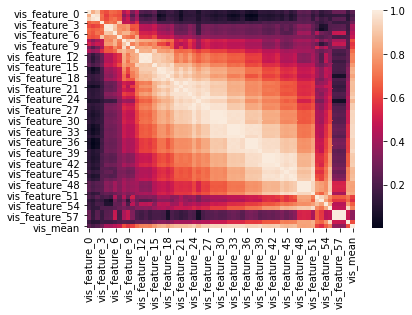

In [87]:
import seaborn as sns
from scipy.stats import pearsonr
sns.heatmap(X_train.loc[:, X_train.columns.str.startswith('vis_')].corr())

<AxesSubplot:>

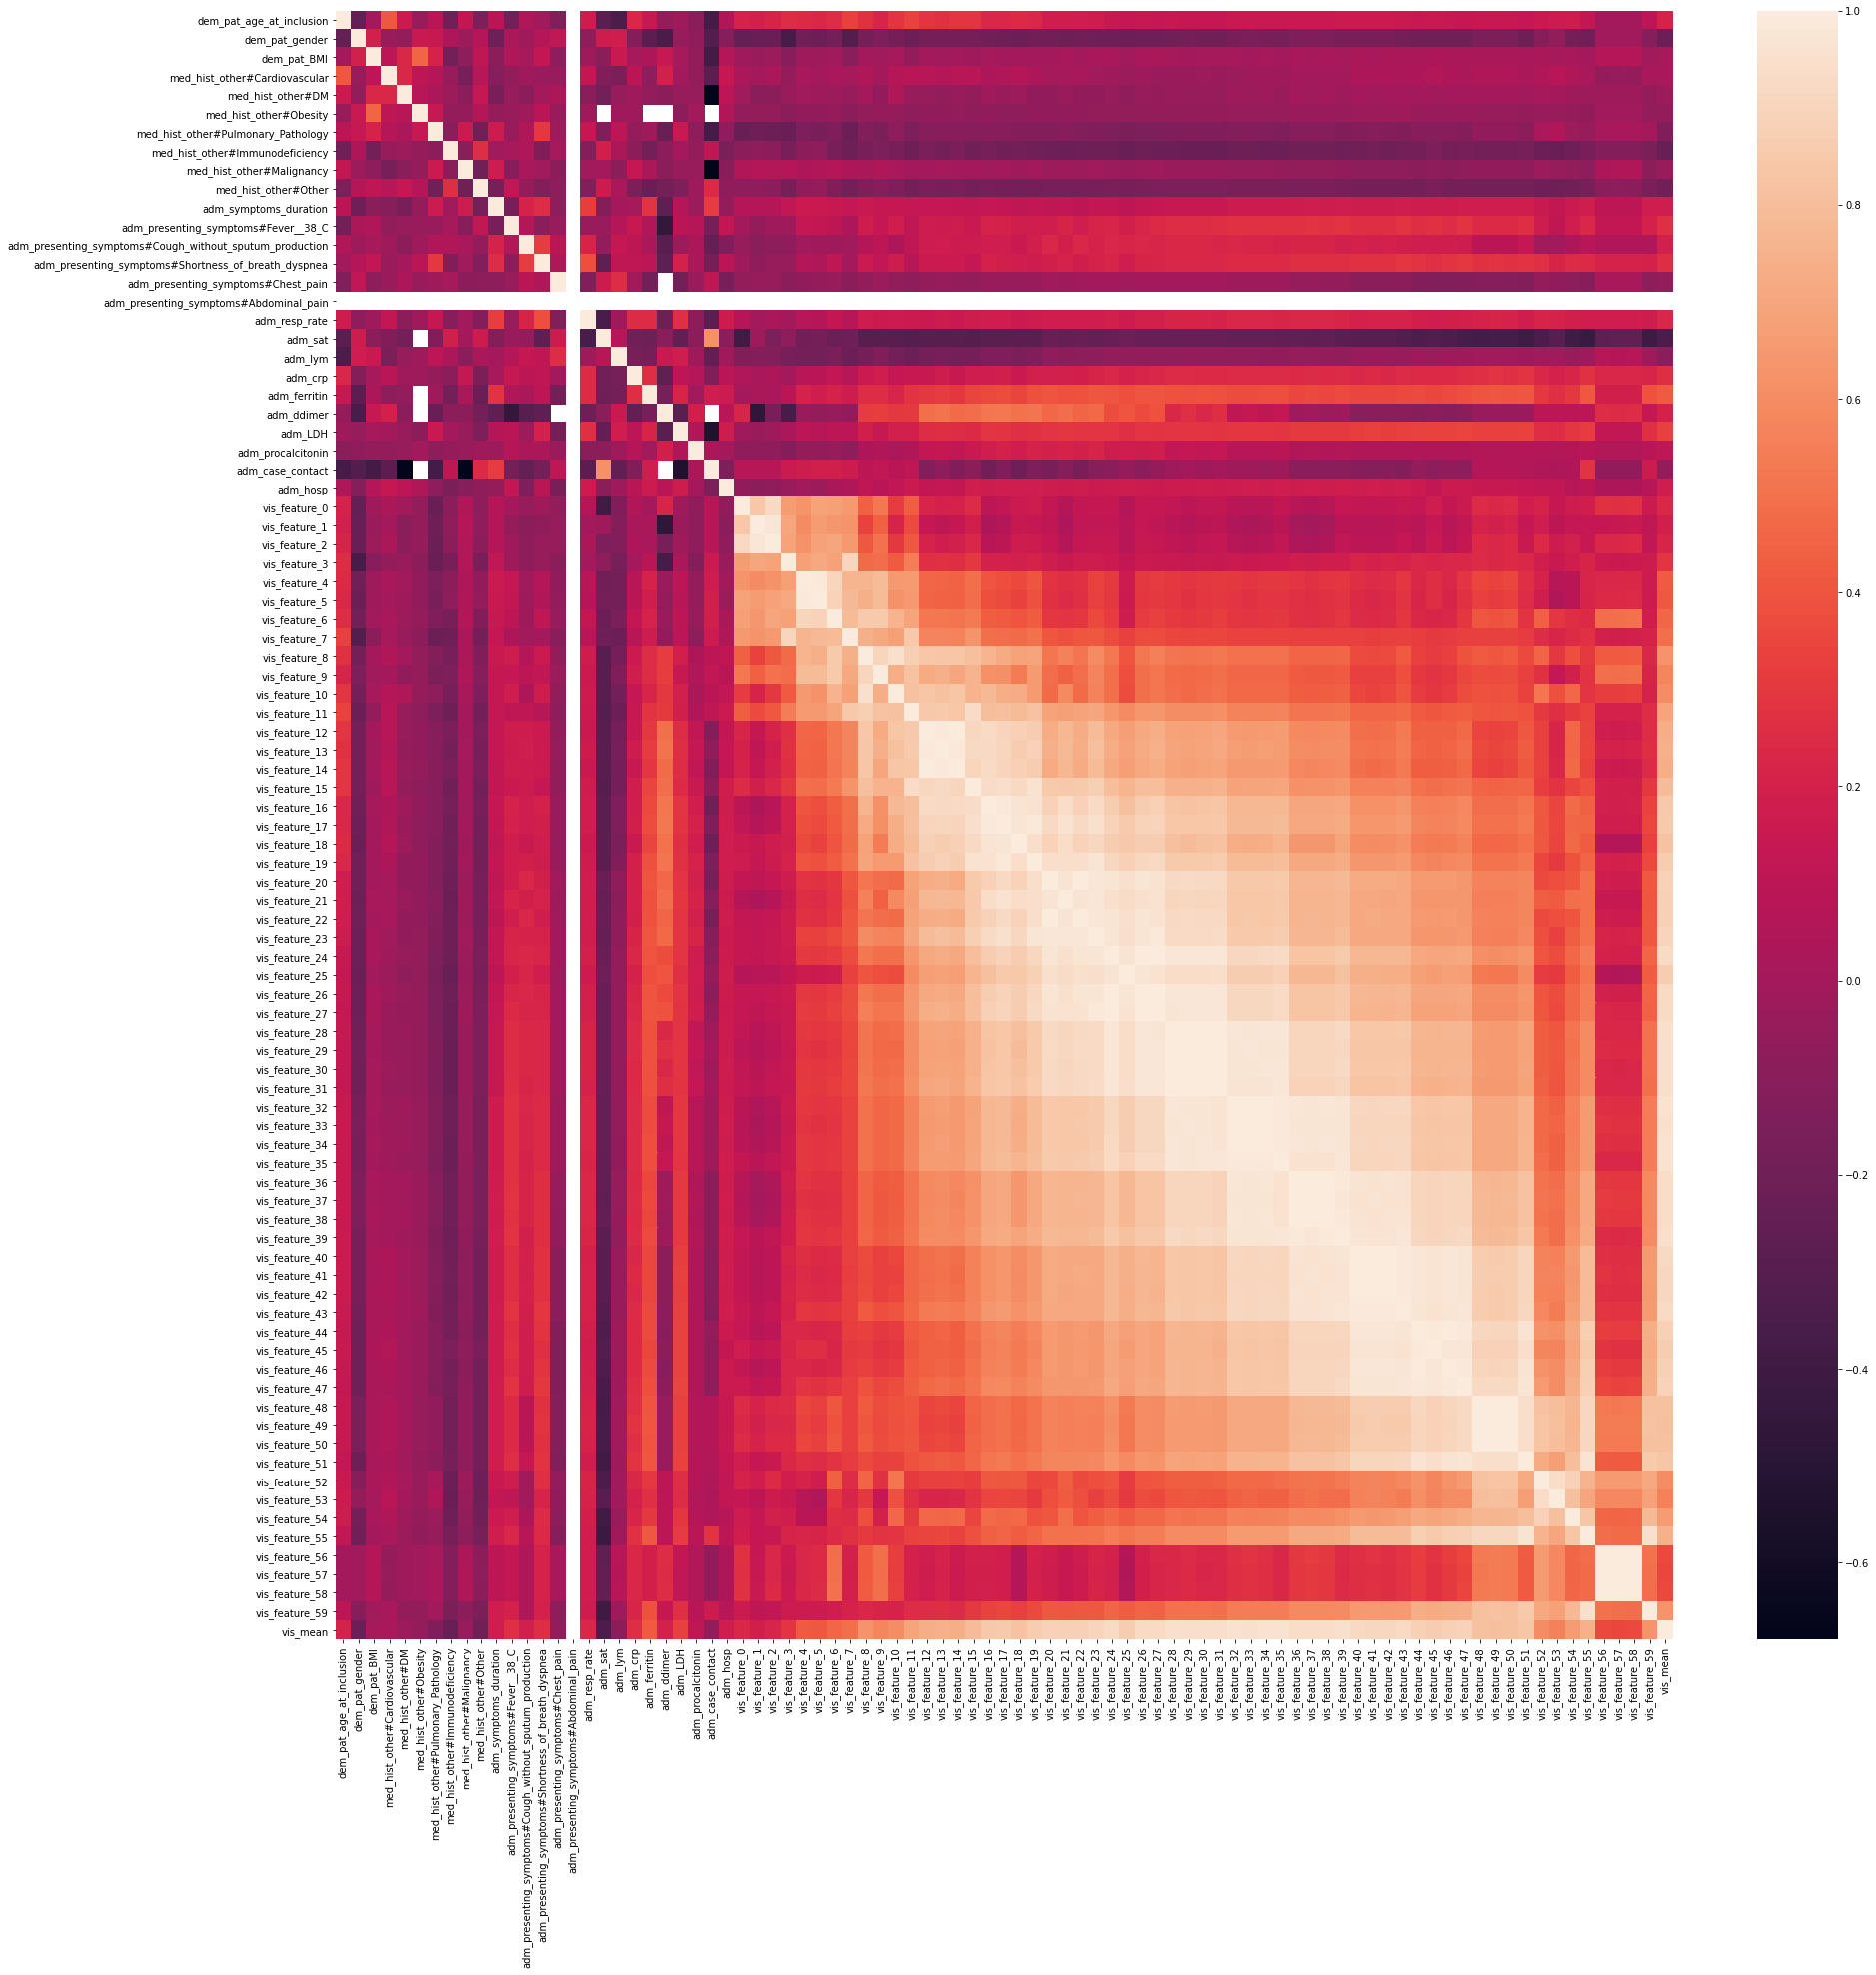

In [97]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 30))
sns.heatmap(X_train.corr(), xticklabels=True, yticklabels=True)

In [112]:
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns, dtype=np.float)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

c:\users\roel\.virtualenvs\diagcovid-ckc2berq\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


<AxesSubplot:>

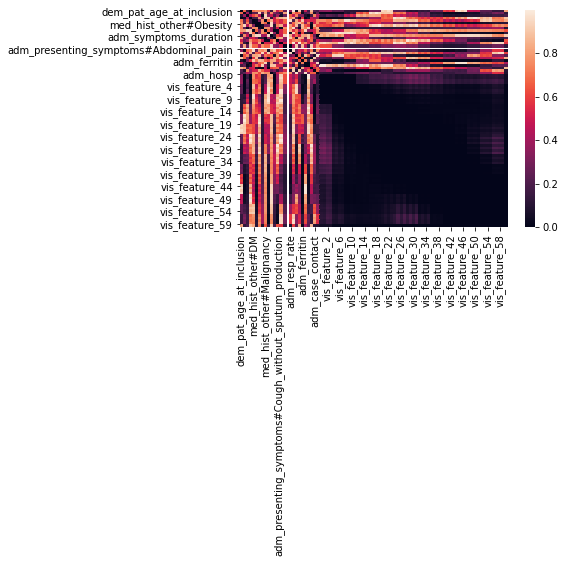

In [118]:
sns.heatmap(calculate_pvalues(X))

In [139]:
roc_auc_score(y_test, LGBMClassifier(n_jobs=-1, **study.best_params).fit(X_train[list(clinical_features)+['vis_mean']], y_train).predict_proba(X_test[list(clinical_features)+['vis_mean']])[:, 1])

c:\users\roel\.virtualenvs\diagcovid-ckc2berq\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


0.8973407544836116

In [132]:
study.best_params

{'boosting_type': 'gbdt',
 'lambda_l1': 0.10414659204005412,
 'lambda_l2': 6.341583816339401e-05,
 'num_leaves': 250,
 'max_depth': 27,
 'feature_fraction': 0.9955996932612647,
 'feature_fraction_bynode': 0.7359551168981595,
 'min_child_samples': 3,
 'linear_tree': False,
 'max_bin': 234,
 'extra_trees': True,
 'path_smooth': 0.0011065193996948604,
 'learning_rate': 1.9910582225271692e-08,
 'min_gain_to_split': 2.1341548124648864e-09,
 'min_sum_hessian_in_leaf': 0.005518956716531994,
 'num_boost_round': 392,
 'bagging_fraction': 0.8020415527721192,
 'bagging_freq': 61}

In [134]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.8877255154639176

In [135]:
roc_auc_score(y_test, LGBMClassifier(n_jobs=-1).fit(X_train[clinical_features], y_train).predict_proba(X_test[clinical_features])[:, 1])

0.8721005154639175

In [281]:
roc_auc_score(y_test, X_test[visual_features].mean(axis=1).fillna(X[visual_features].mean(axis=1).mean()))

0.8833487940630799

In [246]:
X_test

,dem_pat_age_at_inclusion,dem_pat_gender,dem_pat_BMI,med_hist_other#Cardiovascular,med_hist_other#DM,med_hist_other#Obesity,med_hist_other#Pulmonary_Pathology,med_hist_other#Immunodeficiency,med_hist_other#Malignancy,med_hist_other#Other,...,vis_feature_50,vis_feature_51,vis_feature_52,vis_feature_53,vis_feature_54,vis_feature_55,vis_feature_56,vis_feature_57,vis_feature_58,vis_feature_59
170,72,1,23.4,1,0,0,1,1,0,0,...,2.805100,2.705834,1.347470,1.298546,1.334079,1.283345,0.369603,0.348513,0.350738,0.287464
83,78,2,28.5,0,0,0,1,0,0,0,...,-1.310170,-1.287163,-1.058841,-1.044626,-1.065026,-1.054756,-0.726110,-0.729545,-0.743150,-0.797385
415,57,2,NaN,1,0,0,1,0,0,0,...,-1.462591,-1.437089,-1.323771,-1.295943,-1.257096,-1.239721,-0.934861,-0.932648,-0.893160,-0.936538
356,51,2,NaN,0,0,0,1,0,0,0,...,-1.669521,-1.582050,-1.451298,-1.397219,-1.394981,-1.348730,-1.060482,-1.049411,-1.038850,-1.075500
115,50,1,24.3,1,0,0,1,1,0,0,...,2.538630,2.491496,0.071296,0.045696,0.053311,0.024214,-0.631074,-0.640443,-0.656923,-0.714477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,68,1,24.6,0,0,0,0,0,1,0,...,4.918230,4.473729,2.580370,2.248780,2.569730,2.234714,0.686584,0.525119,0.668095,0.457948
237,46,2,45.0,0,0,1,0,0,0,0,...,0.449160,0.446510,-0.437549,-0.437302,-0.445363,-0.448462,-0.749117,-0.756312,-0.766130,-0.818475
386,82,1,NaN,0,0,0,0,0,0,0,...,-0.200553,-0.214872,-0.445200,-0.447022,-0.452203,-0.456361,-0.488018,-0.491235,-0.502243,-0.538423
199,77,1,40.0,1,1,1,0,0,0,0,...,4.611800,4.479058,2.296432,2.249659,2.309884,2.256290,0.357722,0.354054,0.357341,0.306495


In [39]:
X.mean(axis=1).isna()

4

In [106]:
X_test

,dem_pat_age_at_inclusion,dem_pat_gender,dem_pat_BMI,med_hist_other#Cardiovascular,med_hist_other#DM,med_hist_other#Obesity,med_hist_other#Pulmonary_Pathology,med_hist_other#Immunodeficiency,med_hist_other#Malignancy,med_hist_other#Other,...,adm_resp_rate,adm_sat,adm_lym,adm_crp,adm_ferritin,adm_ddimer,adm_LDH,adm_procalcitonin,adm_case_contact,adm_hosp
172,75,1,NaN,0,1,0,1,0,0,0,...,11.0,NaN,1.5,363.0,260.0,0.4,224.0,0.60,0.0,1
173,91,1,NaN,1,1,0,1,0,0,0,...,16.0,95.0,1.9,195.0,352.0,NaN,177.0,0.17,0.0,1
174,47,1,33.0,0,1,1,0,0,0,0,...,25.0,93.0,0.9,113.0,2371.0,0.3,481.0,NaN,0.0,1
175,58,1,NaN,0,0,0,0,0,0,1,...,20.0,98.0,0.4,60.0,471.0,NaN,242.0,0.11,0.0,1
176,74,2,NaN,1,0,0,1,1,0,0,...,16.0,84.0,1.8,81.0,148.0,0.7,380.0,0.16,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,65,2,NaN,0,0,0,1,0,0,0,...,24.0,93.0,0.5,64.0,73.0,0.3,270.0,0.48,NaN,1
430,68,1,NaN,0,0,0,0,0,0,0,...,23.0,83.0,0.3,345.0,4414.0,1.8,616.0,0.58,NaN,1
431,75,2,NaN,1,1,0,0,0,0,0,...,26.0,94.0,1.9,26.0,27.0,NaN,379.0,0.06,0.0,1
432,51,1,NaN,0,0,0,0,0,0,0,...,26.0,95.0,2.0,1.0,345.0,0.2,166.0,NaN,0.0,1


In [110]:
X_test[visual_features].mean(axis=1).fillna(X_test[visual_features].mean(axis=1).mean())

172   NaN
173   NaN
174   NaN
175   NaN
176   NaN
       ..
429   NaN
430   NaN
431   NaN
432   NaN
433   NaN
Length: 262, dtype: float64

In [116]:
X_test

,dem_pat_age_at_inclusion,dem_pat_gender,dem_pat_BMI,med_hist_other#Cardiovascular,med_hist_other#DM,med_hist_other#Obesity,med_hist_other#Pulmonary_Pathology,med_hist_other#Immunodeficiency,med_hist_other#Malignancy,med_hist_other#Other,...,adm_resp_rate,adm_sat,adm_lym,adm_crp,adm_ferritin,adm_ddimer,adm_LDH,adm_procalcitonin,adm_case_contact,adm_hosp
172,75,1,NaN,0,1,0,1,0,0,0,...,11.0,NaN,1.5,363.0,260.0,0.4,224.0,0.60,0.0,1
173,91,1,NaN,1,1,0,1,0,0,0,...,16.0,95.0,1.9,195.0,352.0,NaN,177.0,0.17,0.0,1
174,47,1,33.0,0,1,1,0,0,0,0,...,25.0,93.0,0.9,113.0,2371.0,0.3,481.0,NaN,0.0,1
175,58,1,NaN,0,0,0,0,0,0,1,...,20.0,98.0,0.4,60.0,471.0,NaN,242.0,0.11,0.0,1
176,74,2,NaN,1,0,0,1,1,0,0,...,16.0,84.0,1.8,81.0,148.0,0.7,380.0,0.16,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,65,2,NaN,0,0,0,1,0,0,0,...,24.0,93.0,0.5,64.0,73.0,0.3,270.0,0.48,NaN,1
430,68,1,NaN,0,0,0,0,0,0,0,...,23.0,83.0,0.3,345.0,4414.0,1.8,616.0,0.58,NaN,1
431,75,2,NaN,1,1,0,0,0,0,0,...,26.0,94.0,1.9,26.0,27.0,NaN,379.0,0.06,0.0,1
432,51,1,NaN,0,0,0,0,0,0,0,...,26.0,95.0,2.0,1.0,345.0,0.2,166.0,NaN,0.0,1


In [159]:
df.columns[:50]

Index(['record_id', 'institute_abbreviation', 'dem_pat_age_at_inclusion',
       'dem_pat_gender', 'dem_pat_BMI', 'med_hist_other#Cardiovascular',
       'med_hist_other#DM', 'med_hist_other#Obesity',
       'med_hist_other#Pulmonary_Pathology', 'med_hist_other#Immunodeficiency',
       'med_hist_other#Malignancy', 'med_hist_other#Other', 'adm_date',
       'adm_dept', 'adm_symptoms_duration',
       'adm_presenting_symptoms#Fever__38_C',
       'adm_presenting_symptoms#Cough_without_sputum_production',
       'adm_presenting_symptoms#Shortness_of_breath_dyspnea',
       'adm_presenting_symptoms#Chest_pain',
       'adm_presenting_symptoms#Abdominal_pain', 'adm_resp_rate', 'adm_sat',
       'adm_lym', 'adm_crp', 'adm_ferritin', 'adm_ddimer', 'adm_LDH',
       'adm_procalcitonin', 'diagn_first_PCR_date', 'diagn_first_PCR_result',
       'diagn_first_PCR_material', 'diagn_second_PCR_date',
       'diagn_second_PCR_result', 'diagn_second_PCR_material',
       'diagn_third_PCR_date', 'diag